In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

raw_data = pd.read_csv('bank_data.csv')
raw_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [18]:
df = raw_data.copy()
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [73]:
dummies = pd.get_dummies(df[['Geography', 'Gender']])
dummies.columns

Index(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

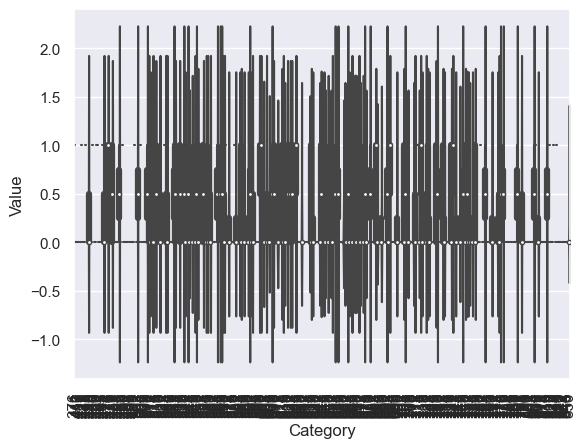

In [56]:
df_sub = df.head(1000)
data = pd.DataFrame({
    'Category': df_sub['CreditScore'],
    'Value': df_sub['Exited']
                    })

sns.violinplot(x  = 'Category', y = 'Value', data = data)
plt.xticks(rotation = 90)
plt.show()

<Axes: >

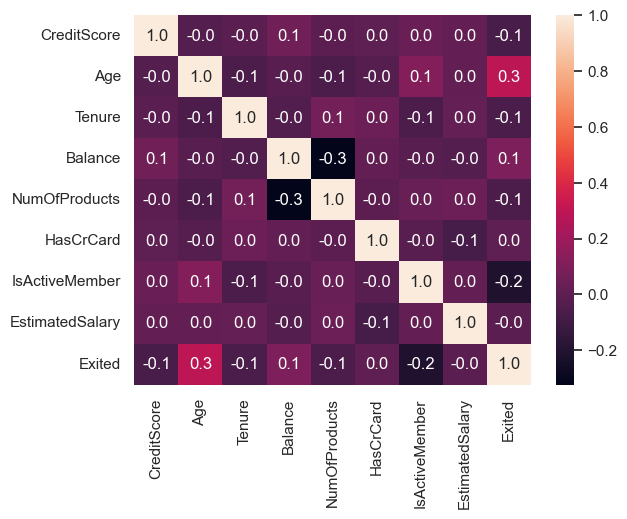

In [68]:
df_map = df_sub.drop(df[['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender']], axis = 1)
# df_map = pd.concat([df_map, dummies], axis = 1)
correlation_matrix = df_map.corr()
sns.heatmap(correlation_matrix, annot = True, fmt = '.1f')

<Axes: >

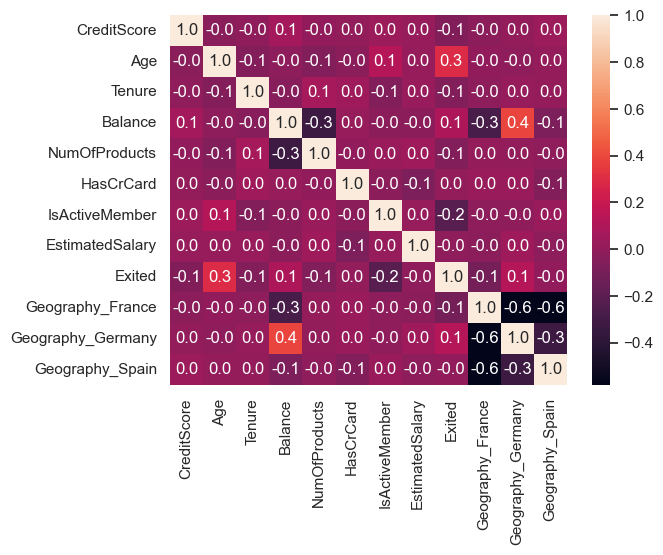

In [74]:
df_map = df_sub.drop(df[['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender']], axis = 1)
df_map = pd.concat([df_map, dummies[['Geography_France', 'Geography_Germany', 'Geography_Spain']]], axis = 1)
correlation_matrix = df_map.corr()
sns.heatmap(correlation_matrix, annot = True, fmt = '.1f')


<Axes: >

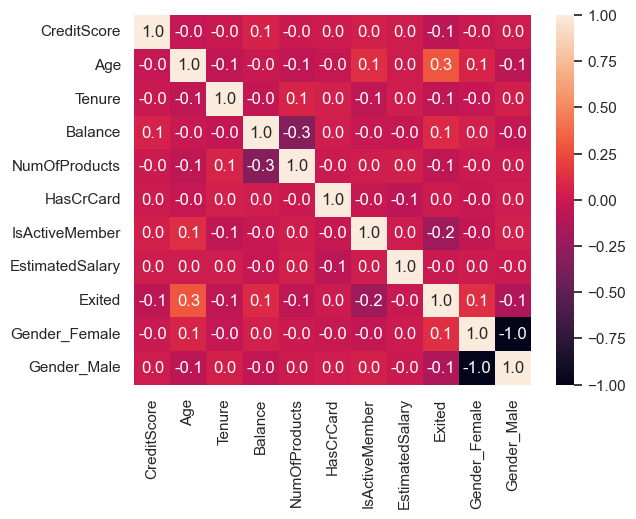

In [76]:
df_map = df_sub.drop(df[['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender']], axis = 1)
df_map = pd.concat([df_map, dummies[['Gender_Female', 'Gender_Male']]], axis = 1)
correlation_matrix = df_map.corr()
sns.heatmap(correlation_matrix, annot = True, fmt = '.1f')


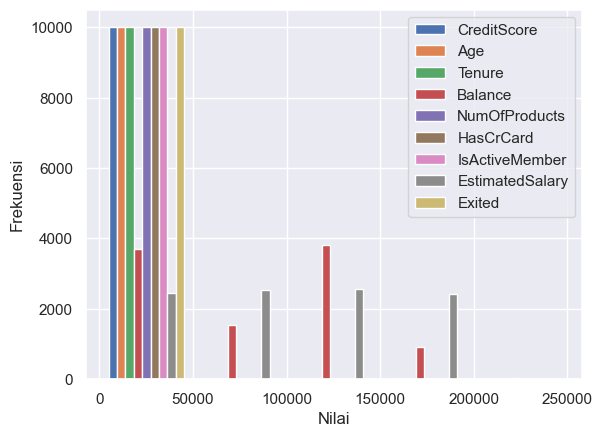

In [75]:
plt.hist(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']], 
         bins=5, 
         label=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'])

plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()